In [19]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from synapse.synSTDP import synSTDP
from utils.statistics import cal_cv, cal_synFactor, cal_kop, cal_information
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [20]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [21]:
N = 1
dt = 0.01
method = "euler"
# conn = create_sw(N, 2, 0.5)
conn = np.ones((1,1), dtype=int)

In [22]:
delta_t_list = np.arange(-60, 60, 10)
Ipre_t = np.arange(100, 1000, 200, dtype=int)*100
w_end = []

In [23]:
for delta_t in delta_t_list:
    delta_t = int(delta_t*100)
    pre = HH(N=N, method=method, dt=dt)
    post = HH(N=N, method=method, dt=dt)
    pre.Iex = 0
    post.Iex = 0
    syn = synSTDP(pre, post, conn=conn)
    syn.lr = .3
    w_init = syn.w.copy()

    # 初始化神经元
    for i in range(10000):
        pre()
        post()

    Ipost_t = Ipre_t+delta_t

    for i in range(150000):
        pre.Iex = 0
        post.Iex = 0
        if i in Ipre_t:
            pre.Iex = 1000
        if i in Ipost_t:
            post.Iex = 1000
        Isyn = syn()
        pre()
        post()

    w_end.append(syn.w[0,0])


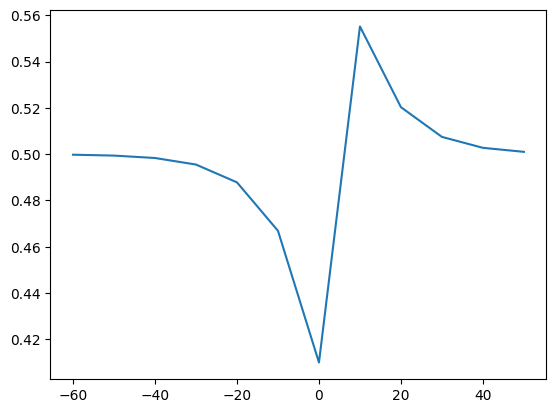

In [24]:
plt.plot(delta_t_list, w_end)

In [41]:
N = 10
dt = 0.01
Tn = 100000
pre = HH(N=N)
post = pre
pre.Iex = 10
# post = HH(N=N)
conn = create_sw(N, 2, 0.5)
syn = synSTDP(pre, post, conn=conn)  # ["electr", "chem_Alpha"]
# syn = synbase(pre, post, conn=conn, synType="chem_Alpha")
# syn.w = .001
syn.lr = 0.01
# 初始化神经元
for i in range(10000):
    post()

# 初始化网络
for i in range(10000):
    Isyn = syn()
    post(Isyn)
    # syn()

time = []
mem = []
for i in range(Tn):
    # 使用泊松过程测试CV
    # pre.Iex=0 
    # pre.Iex=(np.random.rand(N)<0.1).astype(float)*100
    Isyn = syn()
    post(Isyn)
    # syn()
    time.append(syn.t)
    mem.append(syn.post.mem.copy())


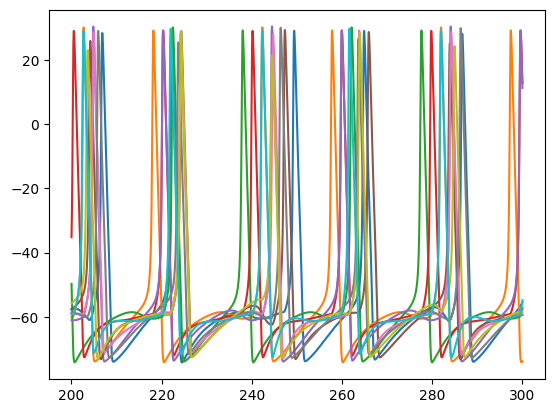

In [42]:
plt.plot(time[0:10000], mem[0:10000])
plt.show()

In [46]:
np.where(syn.w>.5)
syn.w*syn.conn

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.51015865, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.51203077, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5120208 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.50924119, 0.50928435, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48265972],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.51142439],
       [0.5113226 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.51613797, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50692861, 0.        , 0.48366912, 0.        , 0.53600334],
       [0.        , 0.        , 0.       

In [44]:
syn.conn

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 0]])